# Sales analysis

**Import Necessary Libraries**

In [1]:
import pandas as pd
import os

#### Merging 12 months of sales data into a single file

In [2]:
files_list = os.listdir('C:\\Users\\Master\\Downloads\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\sales_data')
files_list

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
all_months_data = pd.DataFrame()

for files in files_list:
    df = pd.read_csv("./sales_data/"+files)
    all_months_data = pd.concat((all_months_data,df))

In [4]:
# converting all months data into csv

all_months_data.to_csv('all_data.csv',index = False)

**Read in update dataframe**

In [5]:
all_months_data.sample(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10805,269674,Google Phone,1,600,10/10/19 20:33,"927 Hickory St, San Francisco, CA 94016"
12464,221814,Lightning Charging Cable,1,14.95,06/29/19 14:46,"657 2nd St, San Francisco, CA 94016"
181,194263,USB-C Charging Cable,2,11.95,05/29/19 19:53,"865 Center St, Seattle, WA 98101"
4599,241084,USB-C Charging Cable,1,11.95,08/23/19 06:19,"762 Maple St, New York City, NY 10001"


In `Order date` column we can see that we have different months

## Cleaning data

Droping all nan row

In [6]:
nan_df = all_months_data[all_months_data.isna().any(axis = 1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
all_months_data = all_months_data.dropna(how='all')

In [8]:
all_months_data.sample(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3040,298569,Apple Airpods Headphones,1,150,12/25/19 13:32,"662 5th St, Boston, MA 02215"
1163,249271,Flatscreen TV,1,300,09/01/19 22:17,"759 11th St, San Francisco, CA 94016"
1704,152126,Lightning Charging Cable,1,14.95,02/13/19 16:29,"96 Hickory St, Austin, TX 73301"
2815,298352,AA Batteries (4-pack),1,3.84,12/20/19 09:10,"393 Cedar St, Boston, MA 02215"


Finding or and deleting it

In [9]:
all_months_data = all_months_data[all_months_data['Order Date'].str[0:2] != 'Or']

In [10]:
all_months_data.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2830,196778,Apple Airpods Headphones,1,150,05/18/19 22:05,"724 11th St, San Francisco, CA 94016"
4221,154525,34in Ultrawide Monitor,1,379.99,02/19/19 14:25,"972 Lakeview St, Atlanta, GA 30301"
723,194780,Google Phone,1,600,05/29/19 12:26,"997 Forest St, Los Angeles, CA 90001"


#### converting column to numeric

In [11]:
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'], errors='coerce')
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'], errors='coerce')

##### Adding a specific column for the month

In [12]:
all_months_data['Month'] = all_months_data['Order Date'].str[0:2]

# converting the months from string to integers

all_months_data['Month'] = all_months_data['Month'].astype('int')


In [13]:
all_months_data.sample(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
19168,277635,USB-C Charging Cable,1,11.95,10/31/19 14:33,"152 13th St, Atlanta, GA 30301",10
7708,286168,Wired Headphones,1,11.99,11/30/19 15:18,"15 Walnut St, Dallas, TX 75001",11


In [14]:
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


##### Adding a specific column for the time

In [15]:
all_months_data['Time'] = all_months_data['Order Date'].str[9:]

In [16]:
all_months_data.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time
4450,299895,Bose SoundSport Headphones,1,99.99,12/07/19 14:44,"896 Maple St, Boston, MA 02215",12,14:44
1086,151541,AA Batteries (4-pack),2,3.84,02/06/19 22:02,"917 Ridge St, San Francisco, CA 94016",2,22:02
10299,219739,Wired Headphones,1,11.99,06/15/19 22:07,"394 Cedar St, Dallas, TX 75001",6,22:07


##### Adding a specific column for the sale

Quantity ordered * Price each

In [17]:
all_months_data['Sales'] = all_months_data['Quantity Ordered'] * all_months_data['Price Each']

##### Adding a specific column for city

In [18]:
all_months_data['City'] = all_months_data['Order Date'].str[9:]

In [47]:
# Using a .apply()

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(" ")[1]

all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: get_city(x)+" "+get_state(x))

## Questions

> `Q1`. What was the best month for sale? and how much was earned that month?

In [48]:
all_months_data.sample(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Sales,City
5005,283582,Wired Headphones,1,11.99,11/16/19 23:13,"480 Meadow St, San Francisco, CA 94016",11,23:13,11.99,San Francisco CA
12763,222097,Bose SoundSport Headphones,1,99.99,06/01/19 11:03,"129 Walnut St, San Francisco, CA 94016",6,11:03,99.99,San Francisco CA


In [49]:
best_month_sale = all_months_data.groupby('Month')[['Sales','Quantity Ordered','Sales']].sum()

In [50]:
best_month_sale

,Sales,Quantity Ordered,Sales
Month,,,
1,1.822257e+06,10903,1.822257e+06
2,2.202022e+06,13449,2.202022e+06
3,2.807100e+06,17005,2.807100e+06
4,3.390670e+06,20558,3.390670e+06
5,3.152607e+06,18667,3.152607e+06
6,2.577802e+06,15253,2.577802e+06
7,2.647776e+06,16072,2.647776e+06
8,2.244468e+06,13448,2.244468e+06
9,2.097560e+06,13109,2.097560e+06


The month december had the most sale per quantity and with also higher selling price earned.  

### Visualization

In [51]:
import matplotlib.pyplot as plt

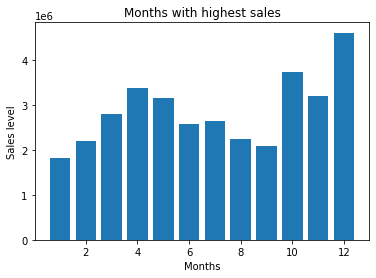

In [52]:
import matplotlib.pyplot as plt

results = all_months_data.groupby('Month')[['Sales']].sum()
months = range(1,13)
plt.title("Months with highest sales")
plt.ylabel("Sales level");
plt.xlabel('Months');
plt.bar(months,results['Sales'])
plt.show()

> `Q2`. What city has the higest number for sale? and how much was earned that month?

In [53]:
all_months_data.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Sales,City
5767,253683,Flatscreen TV,1,300.00,09/14/19 08:40,"241 Highland St, San Francisco, CA 94016",9,08:40,300.00,San Francisco CA
2859,281538,Macbook Pro Laptop,1,1700.00,11/08/19 00:19,"285 Johnson St, Seattle, WA 98101",11,00:19,1700.00,Seattle WA
12256,205749,ThinkPad Laptop,1,999.99,05/03/19 21:03,"772 Jefferson St, New York City, NY 10001",5,21:03,999.99,New York City NY


In [64]:
results = all_months_data.groupby('City')[['Sales']].sum()

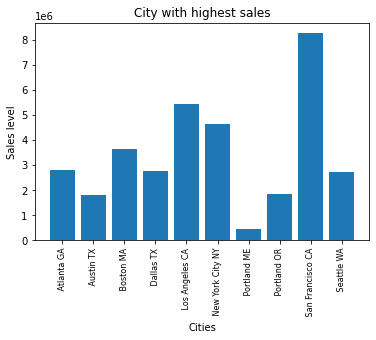

In [73]:
import matplotlib.pyplot as plt

city = [city for city,  df in all_months_data.groupby('City')]
plt.bar(city,results['Sales'])
plt.title("City with highest sales")
plt.xticks(city, rotation = 'vertical', size = 8)
plt.ylabel("Sales level")
plt.xlabel('Cities')

plt.show()

We can see that san francisco has the highest sales

> `Q3`. What time should we display advertisement to maximize likelihood of custumer's buying the product?

In [100]:
# Add hour column
all_months_data['Hour'] = pd.to_datetime(all_months_data['Order Date']).dt.hour
all_months_data['Minute'] = pd.to_datetime(all_months_data['Order Date']).dt.minute
all_months_data['Count'] = 1
all_months_data.sample(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Sales,City,Hour,Minute,Count
10935,306096,USB-C Charging Cable,1,11.95,12/02/19 13:52,"434 12th St, New York City, NY 10001",12,13:52,11.95,New York City NY,13,52,1
542,296179,Apple Airpods Headphones,1,150.00,12/09/19 14:42,"764 Hickory St, Boston, MA 02215",12,14:42,150.00,Boston MA,14,42,1


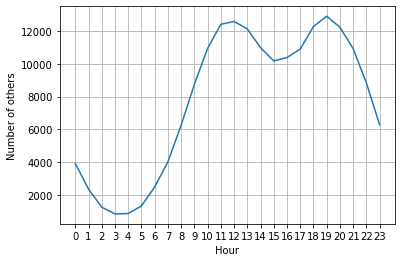

In [102]:
keys = [pair for pair, df in all_months_data.groupby(['Hour'])]

plt.plot(keys, all_months_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.xlabel('Hour')
plt.ylabel("Number of others")
plt.grid()
plt.show()

My recommendation is slightly before **11am or 7pm**

> `Q4`. What product are mostly often sold together

In [103]:
all_months_data.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Sales,City,Hour,Minute,Count
4789,241266,USB-C Charging Cable,1,11.95,08/29/19 10:58,"331 Meadow St, Austin, TX 73301",8,10:58,11.95,Austin TX,10,58,1
13348,189281,Apple Airpods Headphones,1,150.00,04/09/19 19:52,"557 Main St, San Francisco, CA 94016",4,19:52,150.00,San Francisco CA,19,52,1
3531,262725,AAA Batteries (4-pack),1,2.99,10/22/19 19:29,"212 South St, Dallas, TX 75001",10,19:29,2.99,Dallas TX,19,29,1


In [104]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_months_data[all_months_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

<ipython-input-104-511f8ff4d15b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [105]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


> `Q5`What product sold the most? Why do you think it sold the most?


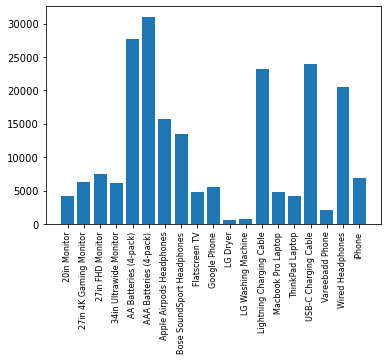

In [108]:
product_group = all_months_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

<ipython-input-112-91dff3081354>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)


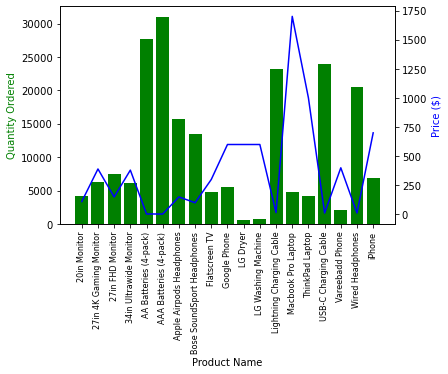

In [112]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_months_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

plt.show()